# Chapter 8. Exploratory data analysis
## Notebook for R

In [1]:
#install.packages(c("tidyverse", "glue", "maps", 
#                   "factoextra"))

In [2]:
library(tidyverse)
library(glue)
library(maps)
library(factoextra)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘glue’


The following object is masked from ‘package:dplyr’:

    collapse



Attaching package: ‘maps’


The following object is masked from ‘package:purrr’:

    map


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



### 8.1 Simple exploratory data analysis

In [3]:
url="https://cssbook.net/d/eurobarom_nov_2017.csv"
d2= read_csv(url, col_names = TRUE)
glue("{nrow(d2)} row x {ncol(d2)} columns")
colnames(d2)


── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  survey = col_character(),
  uniqid = col_double(),
  date = col_character(),
  country = col_character(),
  marital_status = col_character(),
  educational = col_character(),
  gender = col_character(),
  age = col_double(),
  occupation = col_character(),
  type_community = col_character(),
  household_composition = col_character(),
  support_refugees = col_character(),
  support_migrants = col_character(),
  date_n = col_double(),
  support_refugees_n = col_double(),
  support_migrants_n = col_double(),
  educational_n = col_double()
)




33193 row x 17 columns

[1] "survey"                "uniqid"                "date"                 
 [4] "country"               "marital_status"        "educational"          
 [7] "gender"                "age"                   "occupation"           
[10] "type_community"        "household_composition" "support_refugees"     
[13] "support_migrants"      "date_n"                "support_refugees_n"   
[16] "support_migrants_n"    "educational_n"

In [4]:
d2 %>%
  group_by(gender) %>%
  summarise(frequency = n()) %>%
  mutate(rel_freq = frequency / sum(frequency))   

gender,frequency,rel_freq
<chr>,<int>,<dbl>
Man,15477,0.466273
Woman,17716,0.533727


In [5]:
d2 %>%
  group_by(support_refugees) %>%
  summarise(frequency = n()) %>%
  mutate(rel_freq = frequency / sum(frequency)) 

support_refugees,frequency,rel_freq
<chr>,<int>,<dbl>
Tend to agree,12695,0.3824602
Tend to disagree,5391,0.1624138
Totally agree,4957,0.1493387
Totally disagree,3574,0.1076733
NA,6576,0.1981141


In [6]:
n_miss = sum(is.na(d2$support_refugees))
print(glue("# of missing values: {n_miss}"))

d2 = d2 %>% drop_na()
print(glue("Rows after dropping NAs: {nrow(d2)}"))

# of missing values: 6576
Rows after dropping NAs: 23448


In [7]:
print("Crosstab gender and support_refugees:")
d2 %>%
  group_by(gender, support_refugees)%>%
  summarise(n=n())%>%
  pivot_wider(values_from="n",names_from="gender")

print("Summary statistics for group of cases:")
d2 %>%
  group_by(support_refugees, gender)%>%
  summarise(mean_age=mean(age, na.rm = TRUE))

[1] "Crosstab gender and support_refugees:"


`summarise()` has grouped output by 'gender'. You can override using the `.groups` argument.



support_refugees,Man,Woman
<chr>,<int>,<int>
Tend to agree,5067,5931
Tend to disagree,2176,2692
Totally agree,2118,2178
Totally disagree,1524,1762


[1] "Summary statistics for group of cases:"


`summarise()` has grouped output by 'support_refugees'. You can override using the `.groups` argument.



support_refugees,gender,mean_age
<chr>,<chr>,<dbl>
Tend to agree,Man,54.07302
Tend to agree,Woman,53.37380
Tend to disagree,Man,52.81985
Tend to disagree,Woman,52.65676
Totally agree,Man,53.73890
Totally agree,Woman,52.42195
Totally disagree,Man,52.36811
Totally disagree,Woman,53.20375


### 8.2 Visualizing data

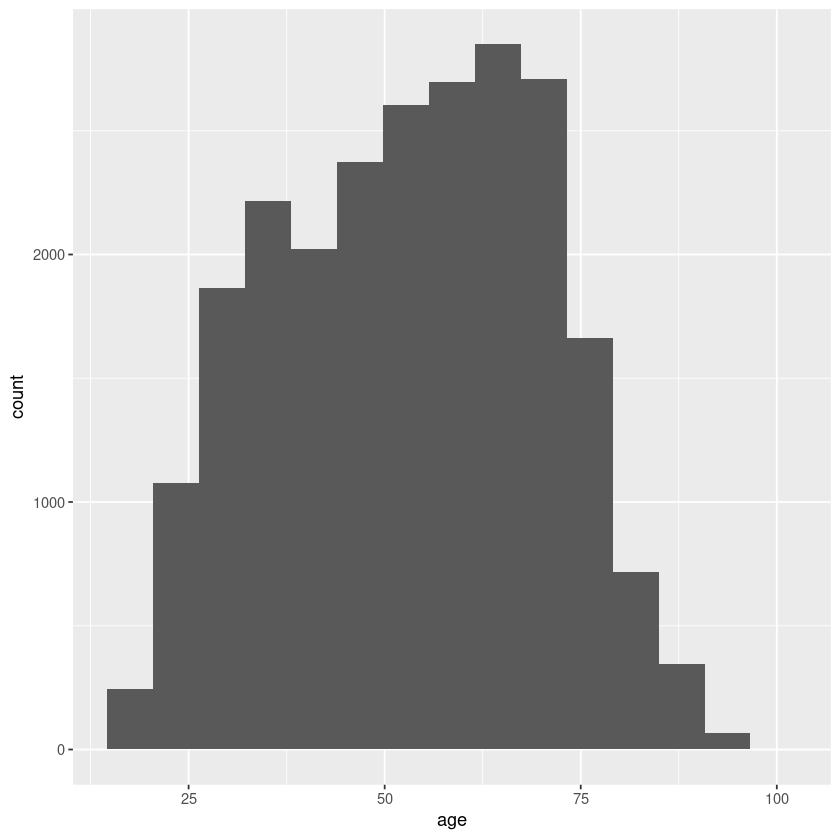

In [8]:
ggplot(data=d2) +
  geom_histogram(mapping = aes(x= age), bins = 15)

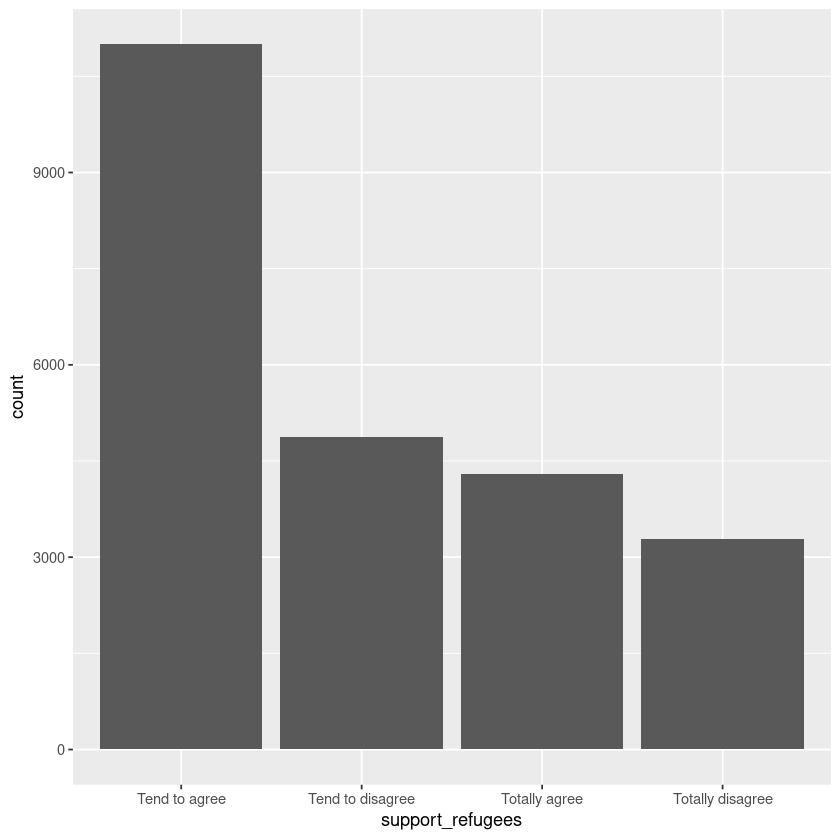

In [9]:
ggplot(data=d2) +
  geom_bar(mapping = aes(x= support_refugees))

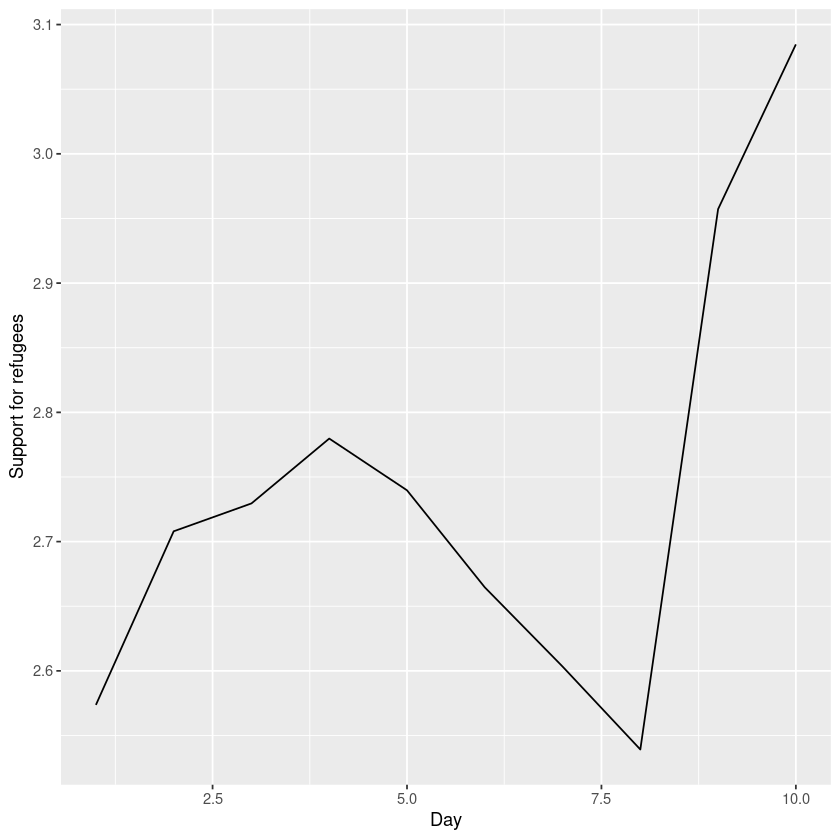

In [10]:
support_refugees = d2 %>%
  group_by(date_n) %>%
  summarise(support=mean(support_refugees_n, 
                         na.rm = TRUE))
ggplot(support_refugees,aes(x=date_n, y=support))+
  geom_line() + 
  xlab("Day") + 
  ylab("Support for refugees")

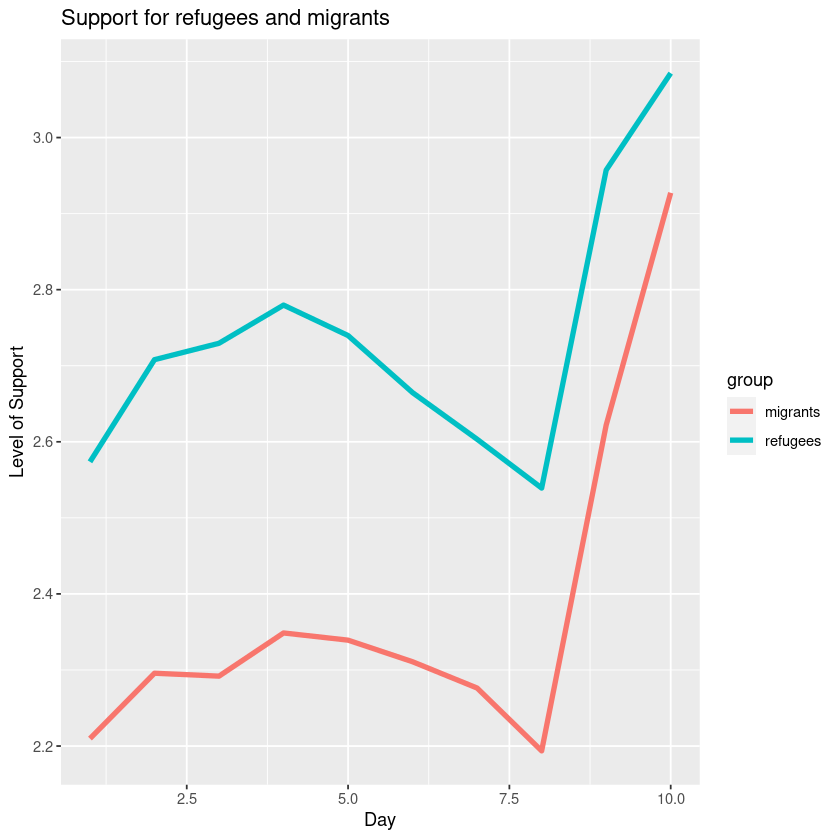

In [11]:
# Combine data
support_combined = d2 %>% group_by(date_n) %>%
 summarise(
  refugees=mean(support_refugees_n, na.rm = TRUE),
  migrants=mean(support_migrants_n, na.rm = TRUE))

# Pivot to long format and plot 
support_long = support_combined %>% 
  pivot_longer(-date_n, names_to="group", 
               values_to="support")
ggplot(support_long, 
       aes(x=date_n, y=support, colour=group)) +
  geom_line(size = 1.5) +
  labs(title="Support for refugees and migrants", 
       x="Day", y="Level of Support") 

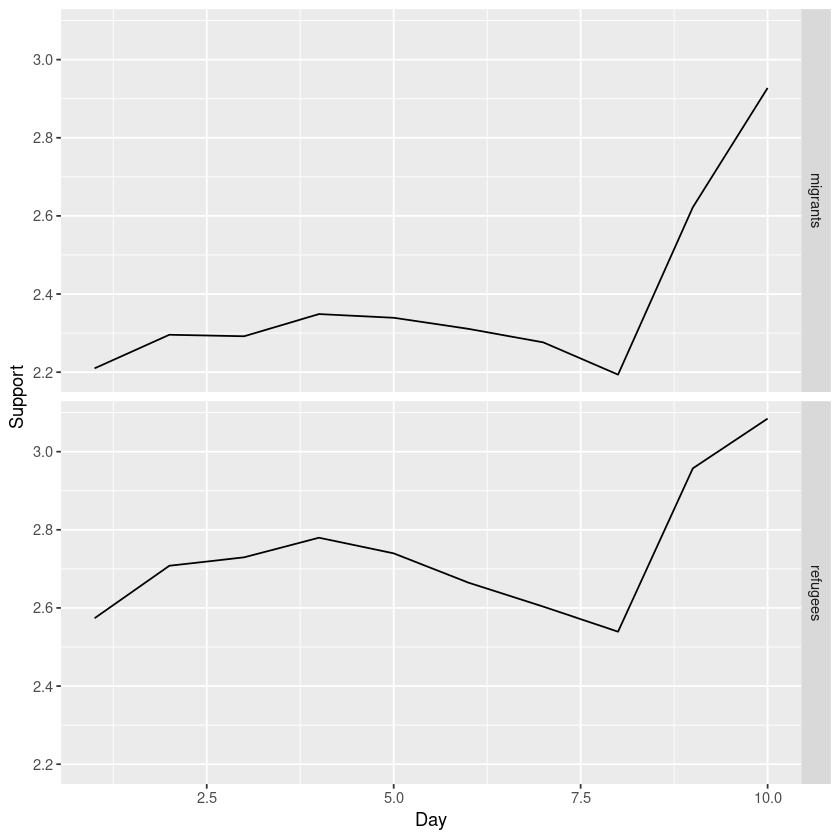

In [12]:
ggplot(support_long, aes(x=date_n, y=support)) +  
  geom_line() + facet_grid(rows=vars(group)) +
  xlab("Day") + ylab("Support")

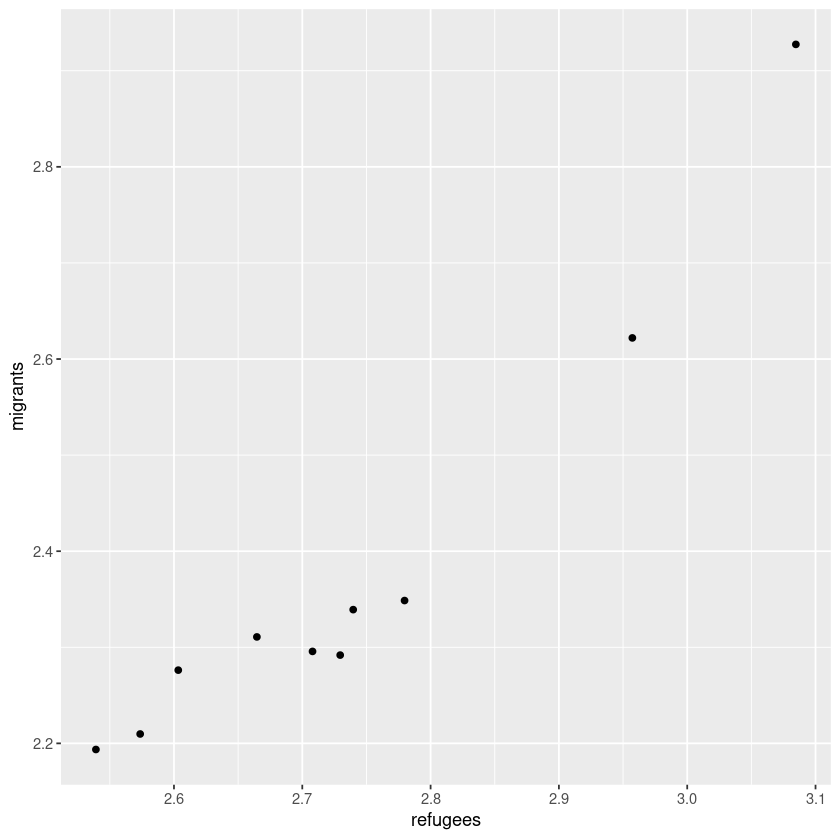

In [13]:
ggplot(support_combined, 
       aes(x=refugees, y=migrants))+
  geom_point()

`geom_smooth()` using formula 'y ~ x'



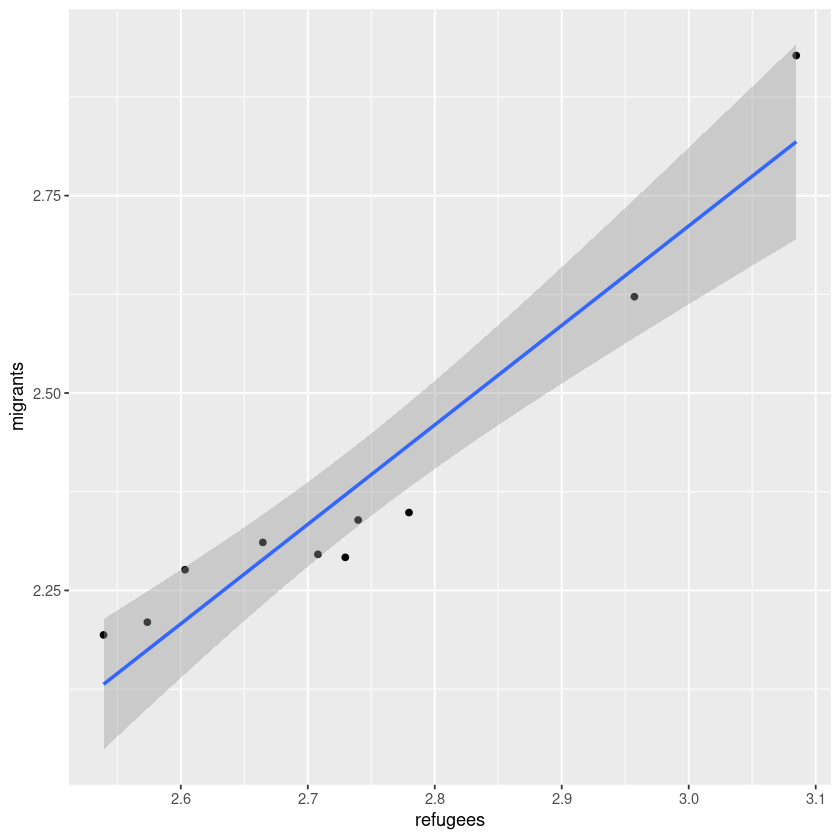

In [14]:
ggplot(support_combined,
       aes(x=refugees, y= migrants))+
  geom_point()+
  geom_smooth(method = lm)

In [15]:
cor.test(support_combined$refugees, 
         support_combined$migrants, 
         method = "pearson")


	Pearson's product-moment correlation

data:  support_combined$refugees and support_combined$migrants
t = 9.0133, df = 8, p-value = 1.833e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8127522 0.9893855
sample estimates:
      cor 
0.9541243 


In [16]:
pivot_data= d2 %>% 
  select(gender, country, support_refugees_n) %>%
  group_by(country, gender) %>%
  summarise(score = mean(support_refugees_n))

`summarise()` has grouped output by 'country'. You can override using the `.groups` argument.



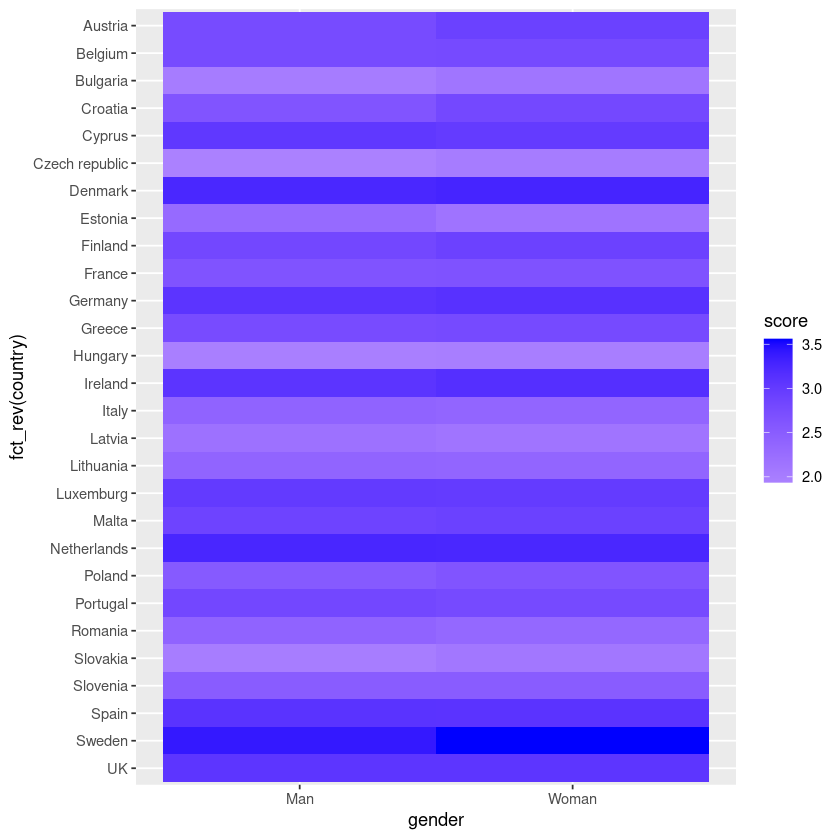

In [17]:
ggplot(pivot_data, aes(x = gender, 
    y = fct_rev(country), fill = score)) + 
  geom_tile()+
  scale_fill_gradient2(low="white", high="blue")

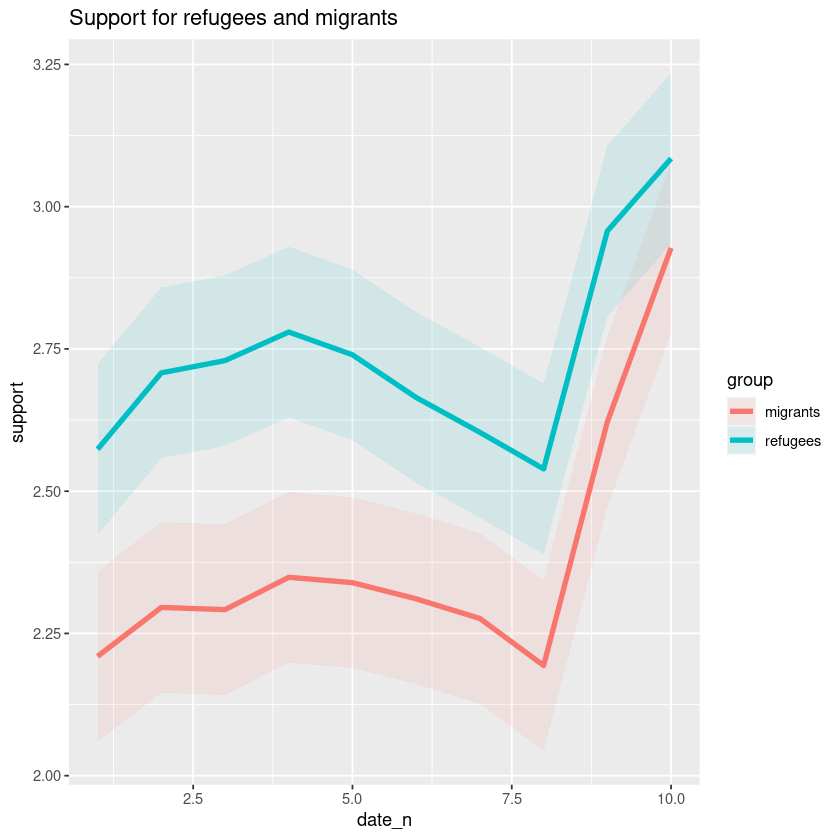

In [18]:
ggplot(support_long, 
       aes(x=date_n, y=support, color=group)) + 
  geom_line(size=1.5) + 
  geom_ribbon(aes(fill=group, ymin=support-0.15,
                  ymax=support+0.15),
              alpha=.1, lty=0) +
  ggtitle("Support for refugees and migrants")

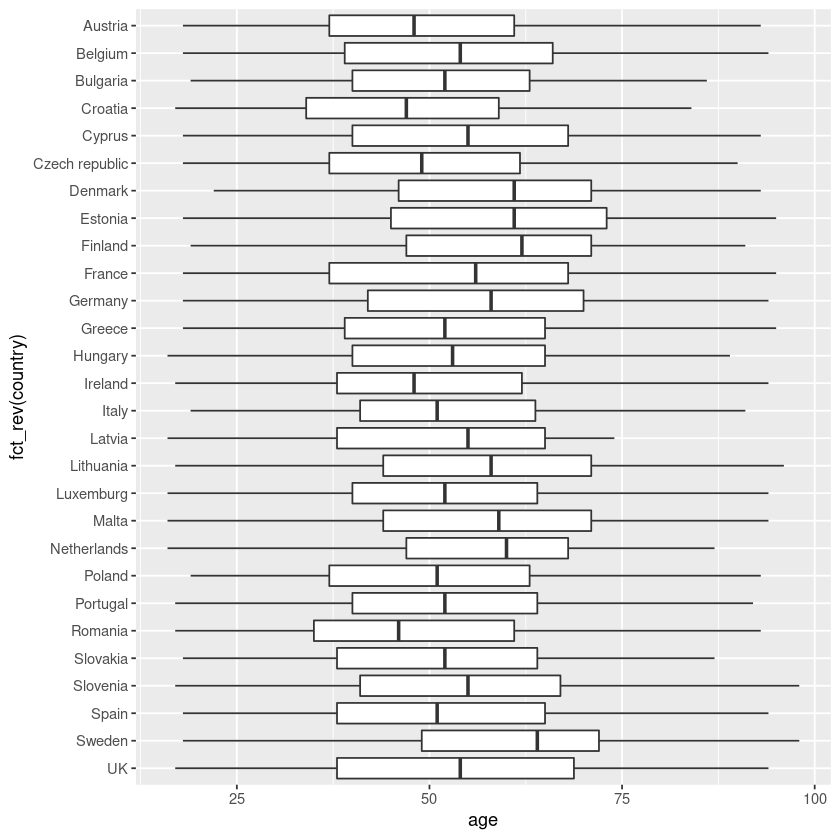

In [19]:
ggplot(d2, aes(y=fct_rev(country), x=age))+
  geom_boxplot()

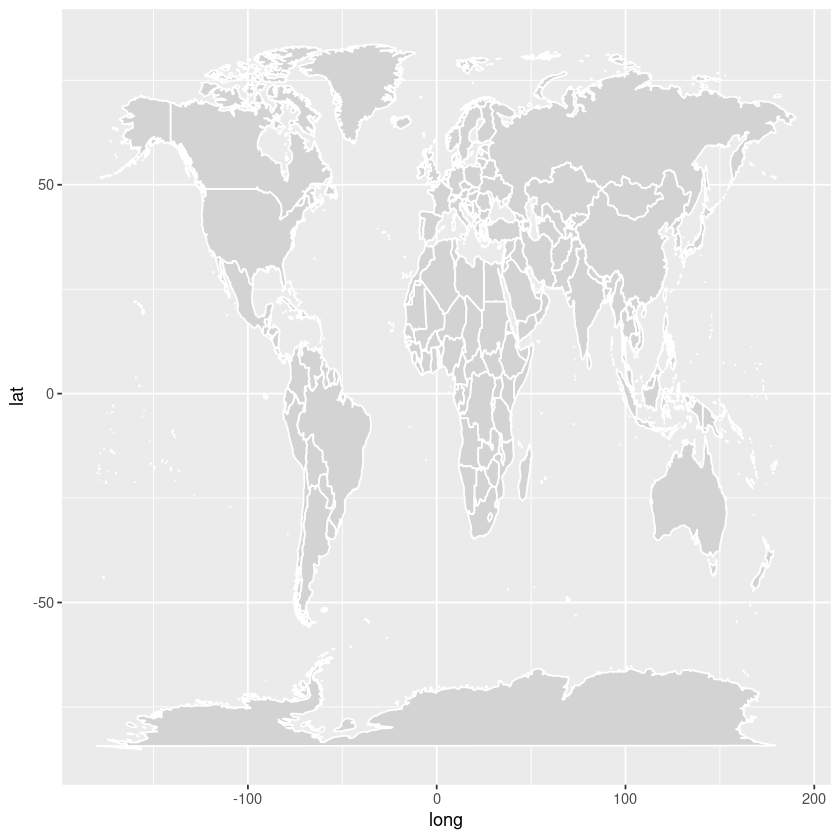

In [20]:
supports_country = d2 %>%
  group_by(country) %>%
  summarise(m=mean(support_refugees_n,na.rm=TRUE))

#Load a world map and plot it
wmap = map_data("world")
ggplot(wmap, aes(x=long,y=lat,group=group)) +
  geom_polygon(fill="lightgray", colour = "white")

In [21]:
countries = c(
  "Portugal", "Spain", "France", "Germany",
  "Austria", "Belgium", "Netherlands", "Ireland",
  "Denmark", "Poland", "UK", "Latvia", "Cyprus",
  "Croatia", "Slovenia", "Hungary", "Slovakia",
  "Czech republic", "Greece", "Finland", "Italy",
  "Luxemburg", "Sweden", "Sweden", "Bulgaria", 
  "Estonia", "Lithuania", "Malta", "Romania")
m = wmap %>% rename(country=region) %>% 
  filter(country %in% countries) %>%
  left_join(supports_country, by="country")

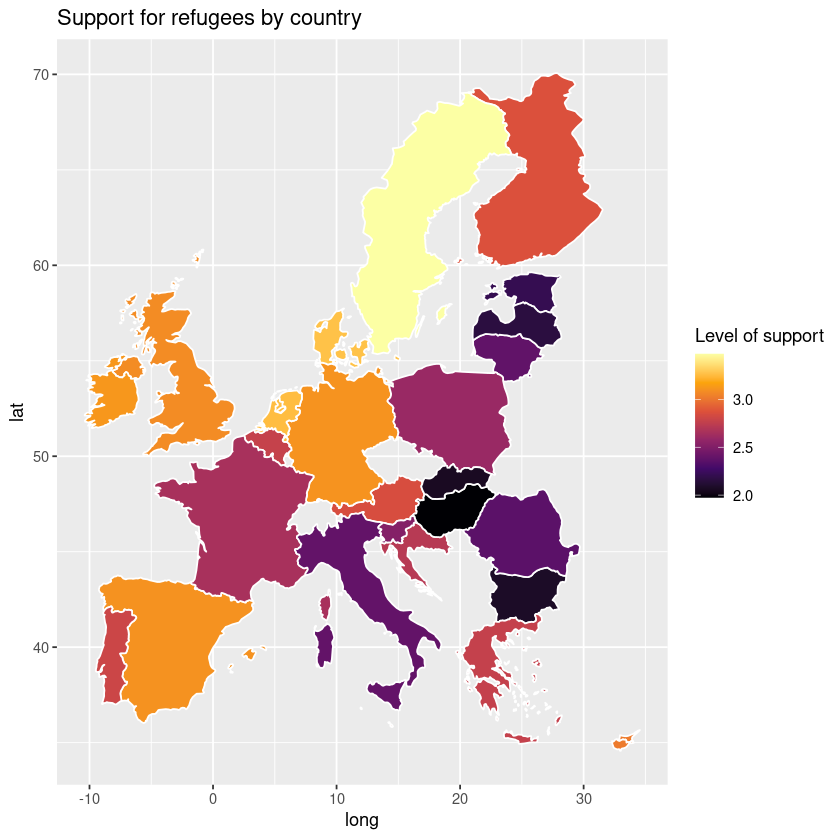

In [22]:
ggplot(m, aes(long, lat, group=group))+
  geom_polygon(aes(fill = m), color="white")+
  scale_fill_viridis_c(option="B")+
  labs(title="Support for refugees by country", 
       fill="Level of support")

### 8.3 Clustering and dimensionality reduction

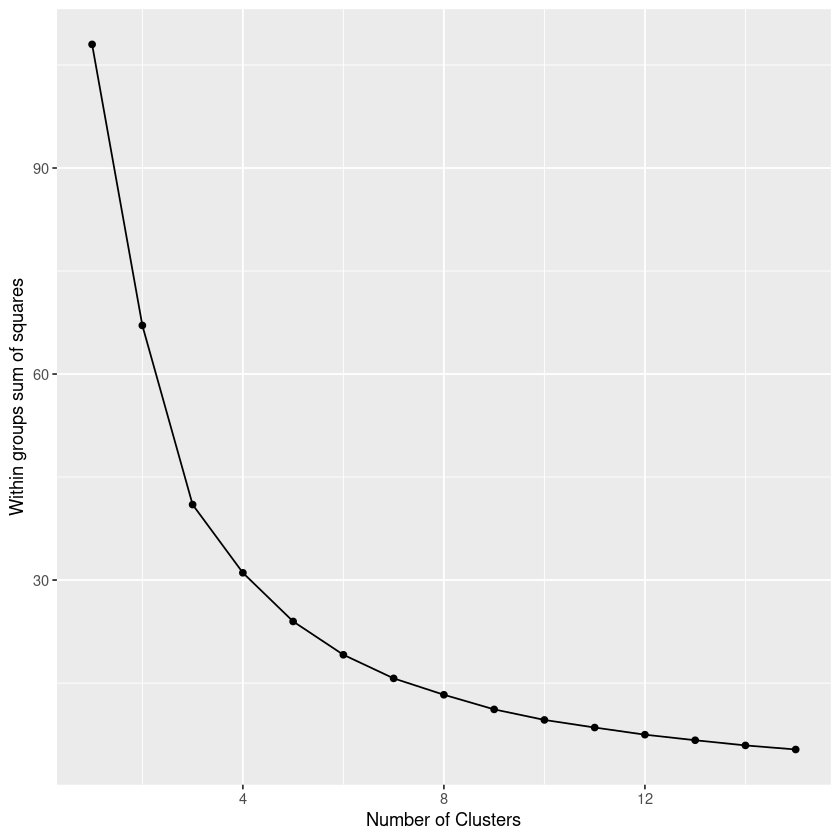

In [23]:
# Average variables by country and scale
d3_s = d2%>%
  group_by(country)%>%
  summarise(
    m_refugees=mean(support_refugees_n, na.rm=T), 
    m_migrants=mean(support_migrants_n, na.rm=T),
    m_age=mean(age, na.rm=T),
    m_edu=mean(educational_n, na.rm=T)) %>%
  column_to_rownames(var="country") %>%
  scale()
# Store sum of squares for 1..15 clusters
wss = list()
for (i in 1:15) {
  km.out = kmeans(d3_s, centers=i, nstart=25)
  wss[[i]] = tibble(k=i, ss=km.out$tot.withinss)
}
wss = bind_rows(wss)
ggplot(wss, aes(x=k, y=ss)) + 
  geom_line() + geom_point() + 
  xlab("Number of Clusters") + 
  ylab("Within groups sum of squares")

In [24]:
set.seed(123)
km.res = kmeans(d3_s, 3, nstart=25)
print(km.res)

K-means clustering with 3 clusters of sizes 13, 3, 12

Cluster means:
  m_refugees m_migrants       m_age      m_edu
1 -0.8739722 -0.8108671 -0.38220489 -0.2117152
2  1.1883363  0.9988783  1.75318903  2.4510670
3  0.6497192  0.6287198 -0.02424197 -0.3834086

Clustering vector:
       Austria        Belgium       Bulgaria        Croatia         Cyprus 
             3              3              1              1              3 
Czech republic        Denmark        Estonia        Finland         France 
             1              2              1              2              3 
       Germany         Greece        Hungary        Ireland          Italy 
             3              1              1              3              1 
        Latvia      Lithuania      Luxemburg          Malta    Netherlands 
             1              1              3              3              3 
        Poland       Portugal        Romania       Slovakia       Slovenia 
             1              3         

Too few points to calculate an ellipse



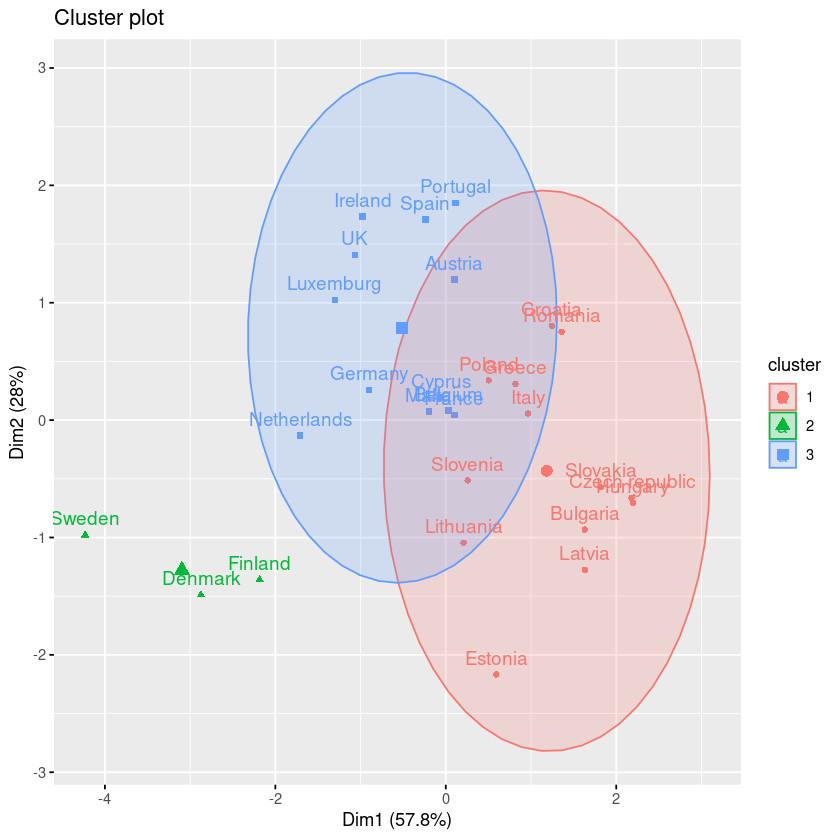

In [25]:
fviz_cluster(km.res, d3_s, ellipse.type="norm")

In [26]:
hc.res <- hcut(d3_s, hc_method="complete")
summary(hc.res)

            Length Class  Mode     
merge        54    -none- numeric  
height       27    -none- numeric  
order        28    -none- numeric  
labels       28    -none- character
method        1    -none- character
call          3    -none- call     
dist.method   1    -none- character
cluster      28    -none- numeric  
nbclust       1    -none- numeric  
silinfo       3    -none- list     
size          2    -none- numeric  
data        112    -none- numeric  

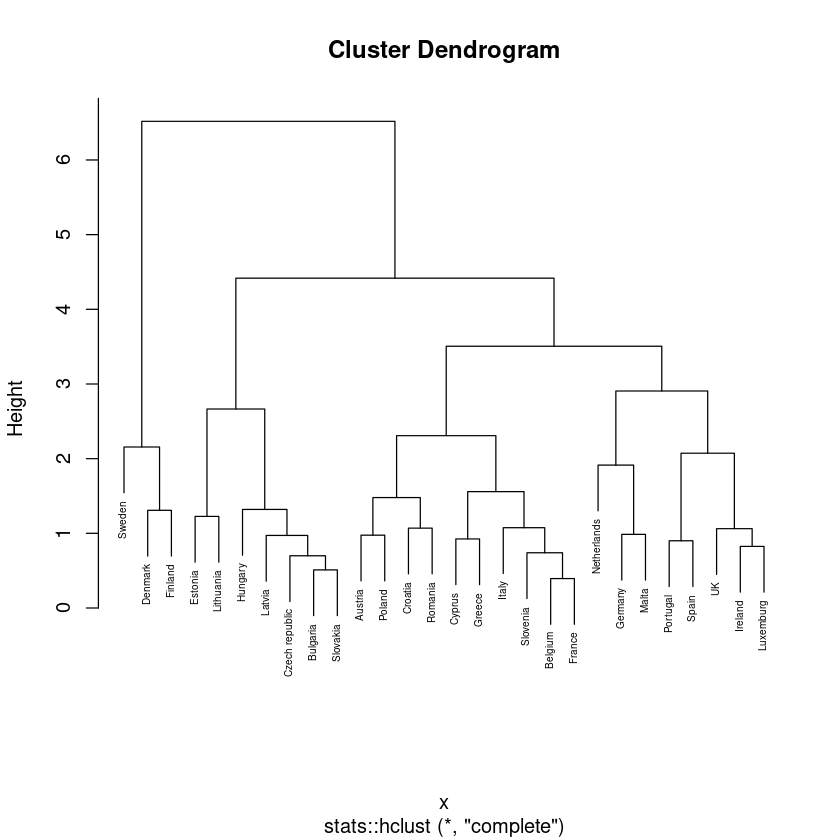

In [27]:
plot(hc.res, cex=0.5)

In [28]:
hc.res = hcut(d3_s, k=3, hc_method="complete") 
summary(hc.res)

            Length Class  Mode     
merge        54    -none- numeric  
height       27    -none- numeric  
order        28    -none- numeric  
labels       28    -none- character
method        1    -none- character
call          3    -none- call     
dist.method   1    -none- character
cluster      28    -none- numeric  
nbclust       1    -none- numeric  
silinfo       3    -none- list     
size          3    -none- numeric  
data        112    -none- numeric  

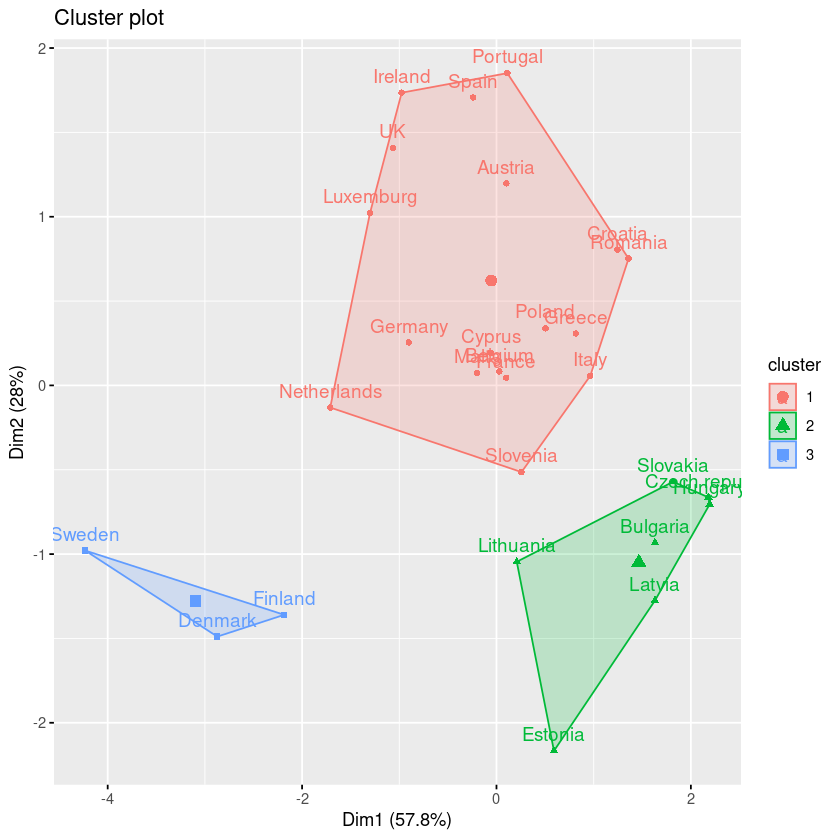

In [29]:
fviz_cluster(hc.res, d3_s, ellipse.type="convex")

In [30]:
pca = prcomp(d3_s, scale=TRUE)
head(pca$x)
pca$rotation

,PC1,PC2,PC3,PC4
Austria,0.10142430,1.19803416,0.52602091,-0.06568251
Belgium,0.02882642,0.08318037,-0.05058673,-0.22350741
Bulgaria,1.63059623,-0.93242257,0.47168110,0.14910143
Croatia,1.24466229,0.80433304,0.90406722,-0.82847927
Cyprus,-0.05949790,0.19239739,-0.56333279,-0.79787757
Czech republic,2.17979559,-0.66348027,0.74991773,0.08459459


,PC1,PC2,PC3,PC4
m_refugees,-0.5732924,0.3690096,-0.13985877,-0.71805799
m_migrants,-0.5135857,0.5331396,0.09428317,0.66565948
m_age,-0.4451170,-0.5586008,-0.67099390,0.19900549
m_edu,-0.4576422,-0.5172613,0.72202312,-0.04107309


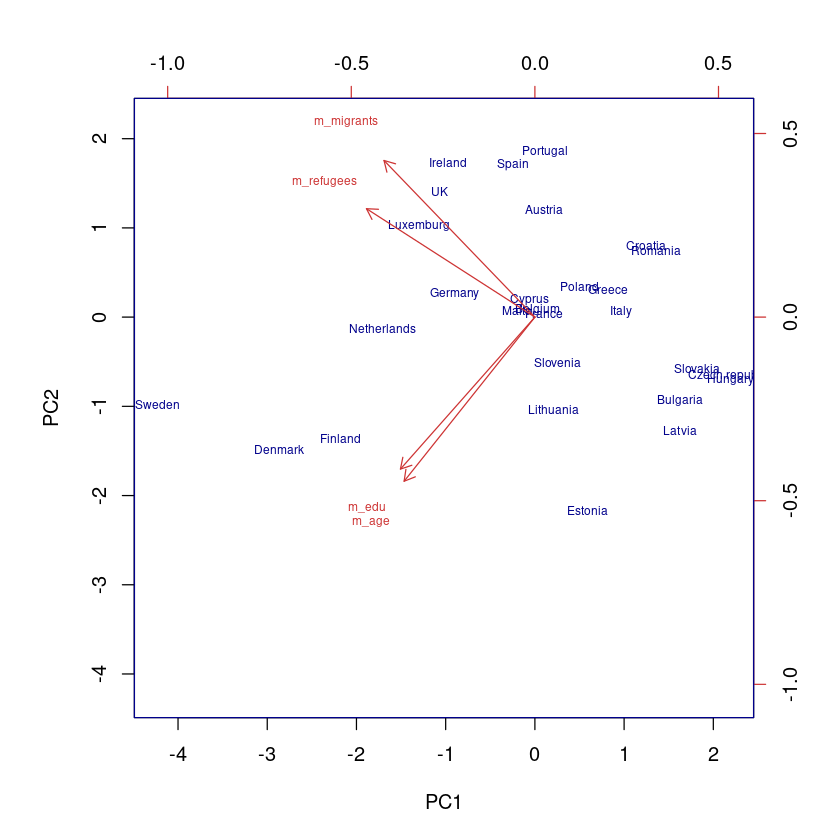

In [31]:
biplot(x = pca, scale = 0, cex = 0.6, 
       col = c("blue4", "brown3"))

In [32]:
print("Proportion of variance explained:")
prop_var = tibble(pc=1:4,
    var=pca$sdev^2 / sum(pca$sdev^2))
prop_var

[1] "Proportion of variance explained:"


pc,var
<int>,<dbl>
1,0.57848569
2,0.27974794
3,0.10344996
4,0.03831642


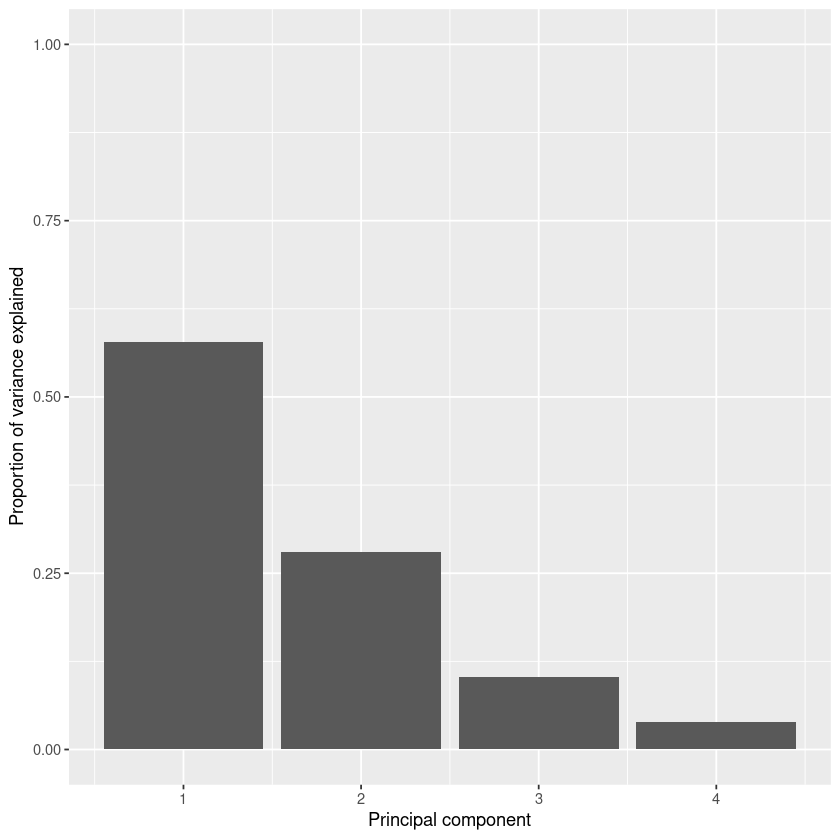

In [33]:
ggplot(prop_var, aes(x=pc, y=var)) +
  geom_col() +
  scale_y_continuous(limits = c(0,1)) +
  xlab("Principal component") + 
  ylab("Proportion of variance explained")

In [34]:
cvar = cumsum(prop_var)
cvar

pc,var
<int>,<dbl>
1,0.5784857
3,0.8582336
6,0.9616836
10,1.0000000


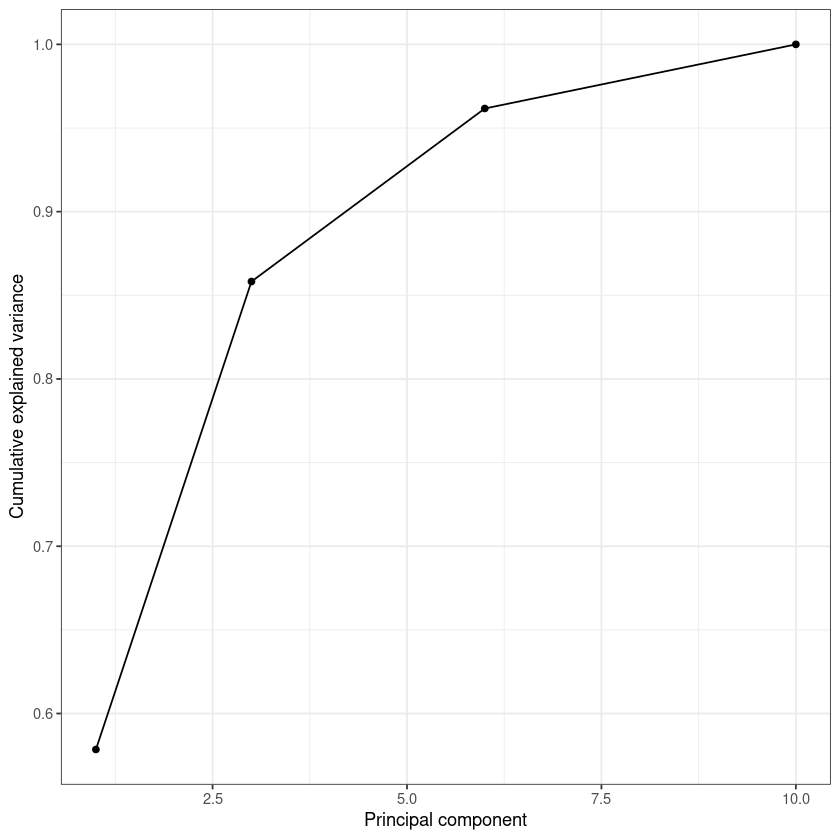

In [35]:
ggplot(cvar, aes(x=pc, y=var)) +
  geom_point() +
  geom_line() +
  theme_bw() +
  xlab("Principal component") +
  ylab("Cumulative explained variance")

,PC1,PC2
Austria,0.10142430,1.19803416
Belgium,0.02882642,0.08318037
Bulgaria,1.63059623,-0.93242257
Croatia,1.24466229,0.80433304
Cyprus,-0.05949790,0.19239739
Czech republic,2.17979559,-0.66348027


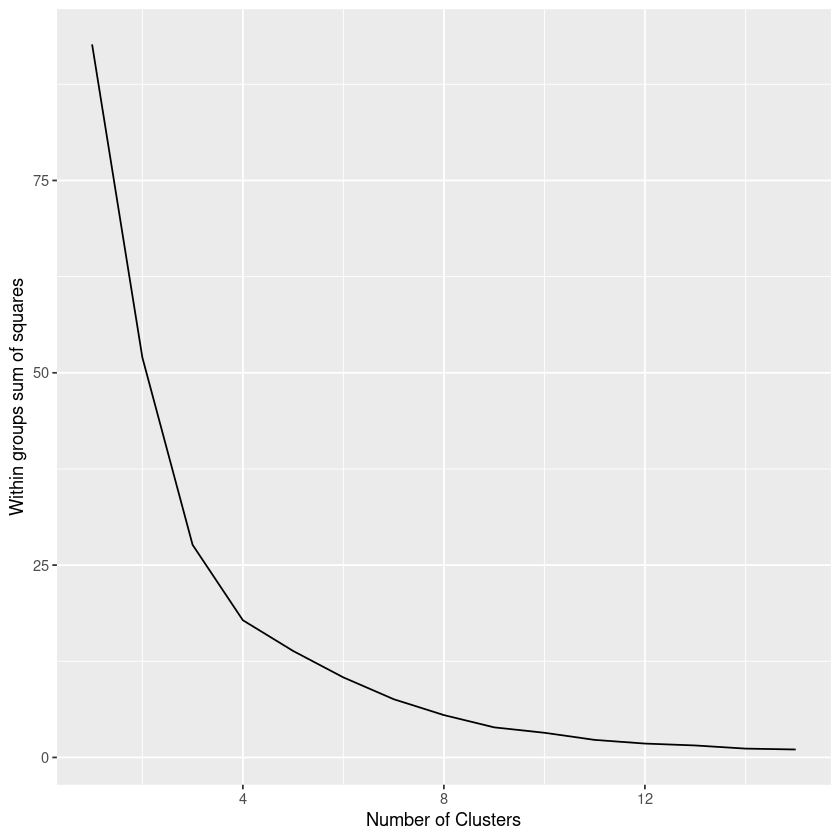

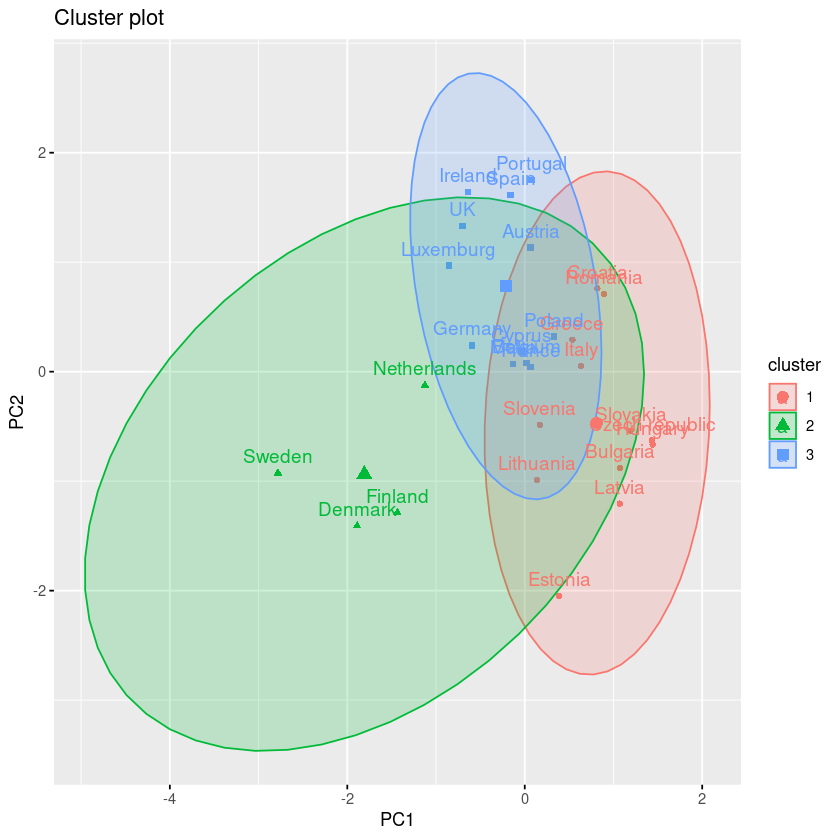

In [36]:
#Generate a new dataset with first components
d5 = pca$x[, c("PC1", "PC2")]
head(d5)

#Get optimal number of clusters
wss = list()
for (i in 1:15) {
  km.out = kmeans(d5, centers = i, nstart = 20)
  wss[[i]] = tibble(k=i, ss=km.out$tot.withinss)
}
wss = bind_rows(wss)

# Plot sum of squares vs. number of clusters
ggplot(wss, aes(x=k, y=ss)) + geom_line() + 
     xlab("Number of Clusters") + 
     ylab("Within groups sum of squares")


# Compute again with k = 3 and visualize
set.seed(123)
km.res_5 <- kmeans(d5, 3, nstart = 25)
fviz_cluster(km.res_5, d5, ellipse.type = "norm")